Multiple Regression
The association between female breast cancer and urban rate and discussion of the evidence of confounding for the association between primary explanatory and response variable. 


In [47]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

In [2]:
# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [3]:
df = pd.read_csv('gapminder.csv')

In [4]:
df.head(10)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7
5,Antigua and Barbuda,11894.4640745081,8.17,,,16225000,,,80.6454545454545,,,,,2.16184329986572,,30.46
6,Argentina,10749.4192379463,9.35,.560987,73.9,5872119000,45.9000015258789,.5,36.0003349500148,75.901,.635943800978195,8,768.428299701347,7.765584,58.4000015258789,92
7,Armenia,1326.74175718861,13.66,2.6184384,51.6,51219666.6666667,34.2000007629394,.1,44.0010245795602,74.241,,5,603.763057563433,3.74158787727356,40.0999984741211,63.86
8,Aruba,,,,,35871000,,,41.8008888888889,75.246,,,,,,46.78
9,Australia,25249.98606148,10.21,.4862799,83.2,12970092666.6667,54.5999984741211,.1,75.8956537961344,81.907,1.91302610912404,10,2825.39109539914,8.4700301251191,61.5,88.74


In [5]:
df.shape

(213, 16)

In [34]:
# convert variables to numeric format using convert_objects function

df['breastcancerper100th'] = pd.to_numeric(df['breastcancerper100th'], errors='coerce')
df['femaleemployrate'] = pd.to_numeric(df['femaleemployrate'], errors='coerce')
df['urbanrate'] = pd.to_numeric(df['urbanrate'], errors='coerce')
df['hivrate'] = pd.to_numeric(df['hivrate'], errors='coerce')
df['co2emissions'] = pd.to_numeric(df['co2emissions'], errors='coerce')
df['alcconsumption'] = pd.to_numeric(df['alcconsumption'], errors='coerce')

In [36]:
#Drop NA
sub1 = df[['breastcancerper100th','femaleemployrate','urbanrate','hivrate','co2emissions','alcconsumption']].dropna()

AxesSubplot(0.125,0.125;0.775x0.755)


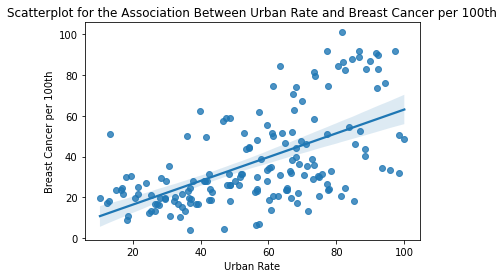

In [10]:
scat1 = sns.regplot(x='urbanrate', y='breastcancerper100th', scatter=True, data=sub1)
plt.xlabel('Urban Rate')
plt.ylabel('Breast Cancer per 100th')
plt.title ('Scatterplot for the Association Between Urban Rate and Breast Cancer per 100th')
print(scat1)


AxesSubplot(0.125,0.125;0.775x0.755)


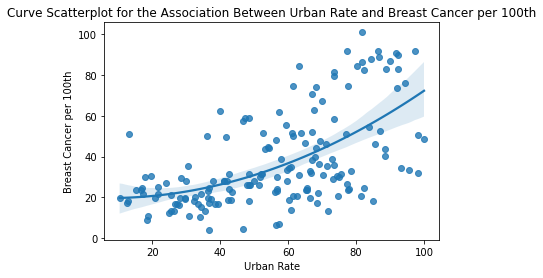

In [12]:
scat2 = sns.regplot(x='urbanrate',y='breastcancerper100th',scatter=True, order=2, data=sub1)
plt.xlabel('Urban Rate')
plt.ylabel('Breast Cancer per 100th')
plt.title('Curve Scatterplot for the Association Between Urban Rate and Breast Cancer per 100th')
print(scat2)

# curve line is not doing a considerabley better explanation compared to straight line

In [37]:
#center quantitative for regression analysis
sub1['urbanrate_c'] = (sub1['urbanrate']-sub1['urbanrate'].mean())
sub1['femaleemployrate_c'] = (sub1['femaleemployrate']-sub1['femaleemployrate'].mean())
sub1['hivrate_c'] = (sub1['hivrate']-sub1['hivrate'].mean())
sub1['co2emissions_c'] = (sub1['co2emissions']-sub1['co2emissions'].mean())
sub1['alcconsumption_c'] = (sub1['alcconsumption']-sub1['alcconsumption'].mean())

In [38]:
sub1.describe()

,breastcancerper100th,femaleemployrate,urbanrate,hivrate,co2emissions,alcconsumption,urbanrate_c,femaleemployrate_c,hivrate_c,co2emissions_c,alcconsumption_c
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,38.01,49.57,55.73,1.81,6818148720.66,7.19,0.00,0.00,0.00,-0.00,0.00
std,24.07,13.90,22.18,4.05,30378166406.80,5.09,22.18,13.90,4.05,30378166406.80,5.09
min,3.90,18.20,10.40,0.06,2368666.67,0.05,-45.33,-31.37,-1.75,-6815780053.99,-7.14
25%,19.75,39.95,36.97,0.10,70443083.33,3.12,-18.77,-9.62,-1.71,-6747705637.32,-4.07
50%,29.75,48.80,57.23,0.40,292259000.00,6.50,1.50,-0.77,-1.41,-6525889720.66,-0.69
75%,50.25,58.10,72.53,1.20,2468769416.67,10.21,16.80,8.53,-0.61,-4349379303.99,3.02
max,101.10,83.30,100.00,25.90,334220872333.33,23.01,44.27,33.73,24.09,327402723612.68,15.82


In [17]:
reg1 = smf.ols('breastcancerper100th ~ urbanrate_c',data=sub1).fit()
print(reg1.summary())

                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.339
Model:                              OLS   Adj. R-squared:                  0.335
Method:                   Least Squares   F-statistic:                     84.46
Date:                  Wed, 10 Aug 2022   Prob (F-statistic):           1.63e-16
Time:                          16:16:38   Log-Likelihood:                -725.26
No. Observations:                   167   AIC:                             1455.
Df Residuals:                       165   BIC:                             1461.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.4251      1.

The regression line used here is Y=37.4251+0.5851Xi. The results of the linear regression model indicated that urban rate (Beta=0.5851, p=0.0001 which is <0.05 means significant coefficent) was significantly and positively associated with breast cancer. And the R-squared was 0.339. 

In [18]:
reg2 = smf.ols('breastcancerper100th ~ urbanrate_c + femaleemployrate_c',data=sub1).fit()
print(reg2.summary())

                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.353
Model:                              OLS   Adj. R-squared:                  0.345
Method:                   Least Squares   F-statistic:                     44.68
Date:                  Wed, 10 Aug 2022   Prob (F-statistic):           3.24e-16
Time:                          16:21:46   Log-Likelihood:                -723.46
No. Observations:                   167   AIC:                             1453.
Df Residuals:                       164   BIC:                             1462.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

The regression line used here is Y2=37.4251+0.6253X1+0.1954X2. The results of linear regression model indicated that urban rate was still significantly and positively associated with breast cancer. However female employee rate was not significantly associated with the breast cancer. 

In [25]:
reg3 = smf.ols('breastcancerper100th ~ urbanrate_c + hivrate_c',data=sub1).fit()
print(reg3.summary())

                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.427
Model:                              OLS   Adj. R-squared:                  0.419
Method:                   Least Squares   F-statistic:                     52.54
Date:                  Wed, 10 Aug 2022   Prob (F-statistic):           8.91e-18
Time:                          16:49:53   Log-Likelihood:                -621.49
No. Observations:                   144   AIC:                             1249.
Df Residuals:                       141   BIC:                             1258.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.9326      1.

In [31]:
reg4 = smf.ols('breastcancerper100th ~ urbanrate_c + co2emissions_c',data=sub1).fit()
print(reg4.summary())

                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.468
Model:                              OLS   Adj. R-squared:                  0.460
Method:                   Least Squares   F-statistic:                     61.10
Date:                  Wed, 10 Aug 2022   Prob (F-statistic):           9.13e-20
Time:                          16:54:05   Log-Likelihood:                -607.92
No. Observations:                   142   AIC:                             1222.
Df Residuals:                       139   BIC:                             1231.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.014

In [44]:
reg5 = smf.ols('breastcancerper100th ~ urbanrate_c + alcconsumption_c',data=sub1).fit()
print(reg5.summary())

                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.508
Model:                              OLS   Adj. R-squared:                  0.501
Method:                   Least Squares   F-statistic:                     71.83
Date:                  Wed, 10 Aug 2022   Prob (F-statistic):           3.77e-22
Time:                          17:02:32   Log-Likelihood:                -602.31
No. Observations:                   142   AIC:                             1211.
Df Residuals:                       139   BIC:                             1219.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

The regression line used here is Y=38.0148+0.6054X1+1.3702X2.The results of linear regression model indicated that urban rate was still significantly and positively associated with breast cancer. Alcoho comsuption was also significantly positive associated with breast cancer. 

Evaluating Model fits
Residual Plot: visually evaluate specification error. 
1. Q-Q plot

Figure(432x288)


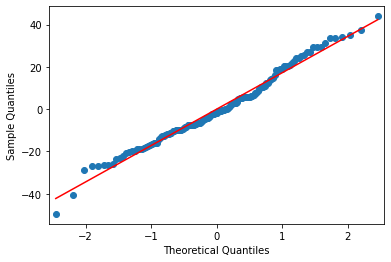

In [48]:
#Q-Q plot for normality 
#if the residuals in a qq plot follow a straight line, this means that the residuals are normally distributed.

fig1 = sm.qqplot(reg5.resid, line='r')
print(fig1)

The g-g plot shows that the residuals generally follow a straight line but deviate at the lower quantiles. 

2. Standardized residuals for all observations

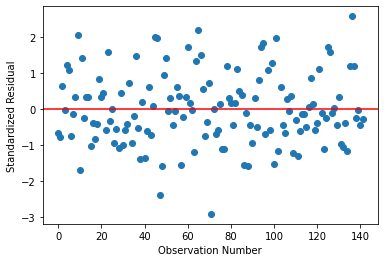

In [51]:
#simple plot of residuals

stdres = pd.DataFrame(reg5.resid_pearson)
fig2 = plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
print(fig2)

There are couples of residuals from our observationmore value exceeded an absolute value of 2.5 and more than 5% have an absoluat value of greater than or equal to 2. This suggests that the fit of the model is relatively poor and could be improved.

3. Leverage plot

Figure(432x288)


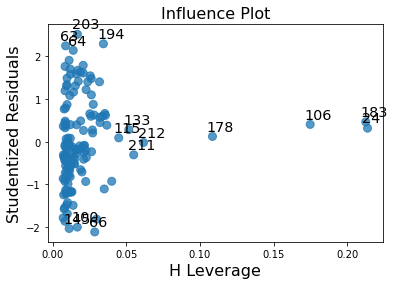

In [52]:
fig3 = sm.graphics.influence_plot(reg3, size=8)
print(fig3)

According to the Leverage plot, we can see that we havve a few outliers, contents that have residuals greater than 2 or less than -2. This plot also tells us that these outliers have small or close to zero leverage values, meaning that although they are outlying observations, they do not have an undue influence on the estimation of the regression model. On the other hand, there are a few cases with higher than average leverage. However, these observations have a high leverage but are not outliers.

The regression line used here is Y=38.0148+0.6054X1+1.3702X2.The results of linear regression model indicated that urban rate was still significantly and positively associated with breast cancer. Alcohol comsuption was also significantly positive associated with breast cancer. 